# Setup
```sh
$ conda inatall jupyterlab pandas matplotlib seaborn keras scikit-learn
```
# Reference

1. [Kaggle TimeSeries-Multivariate](https://www.kaggle.com/lokeshkumarn/timeseries-multivariate?fbclid=IwAR0smouo4dEScHOj5xSYhVeII8i2OPqtp03PdFXFqiM_BwuGietiwYDEOB8) 
2. [Jason Brownlee, Multivariate Time Series Forecasting with LSTMs in Keras](https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/) 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from datetime import datetime as dt
# load data
def parse(x):
    return dt.strptime(x, '%Y %m %d %H')
df = pd.read_csv(
    'raw.csv',
    parse_dates = [['year', 'month', 'day', 'hour']],
    index_col=0, date_parser=parse
)
df=df[24:]
df.head()

,No,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,,
2010-01-02 00:00:00,25,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,26,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,27,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,28,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,29,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [3]:
df.drop('No', axis=1, inplace=True)
# manually specify column names
df.columns = ['pm2_5', 'dew', 'temp', 'press', 'w_dir', 'w_speed', 'snow', 'rain']
df.index.name = 'date'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43800 entries, 2010-01-02 00:00:00 to 2014-12-31 23:00:00
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pm2_5    41757 non-null  float64
 1   dew      43800 non-null  int64  
 2   temp     43800 non-null  float64
 3   press    43800 non-null  float64
 4   w_dir    43800 non-null  object 
 5   w_speed  43800 non-null  float64
 6   snow     43800 non-null  int64  
 7   rain     43800 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 3.0+ MB


In [5]:
sorted(df.w_dir.unique())

['NE', 'NW', 'SE', 'cv']

In [6]:
#df['w_dir_cc']=df['w_dir'].astype('category').cat.codes
#df1=df.drop(['w_dir'],axis=1)

In [7]:
df['w_dir_ne']= (df.w_dir=='NE').astype(int)
df['w_dir_nw']= (df.w_dir=='NW').astype(int)
df['w_dir_se']= (df.w_dir=='SE').astype(int)
df['w_dir_cv']= (df.w_dir=='cv').astype(int)
df1=df.drop(['w_dir'],axis=1)

In [8]:
df1.head()

,pm2_5,dew,temp,press,w_speed,snow,rain,w_dir_ne,w_dir_nw,w_dir_se,w_dir_cv
date,,,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0,0,0,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0,0,0,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2f16973c8>,
      dtype=object)

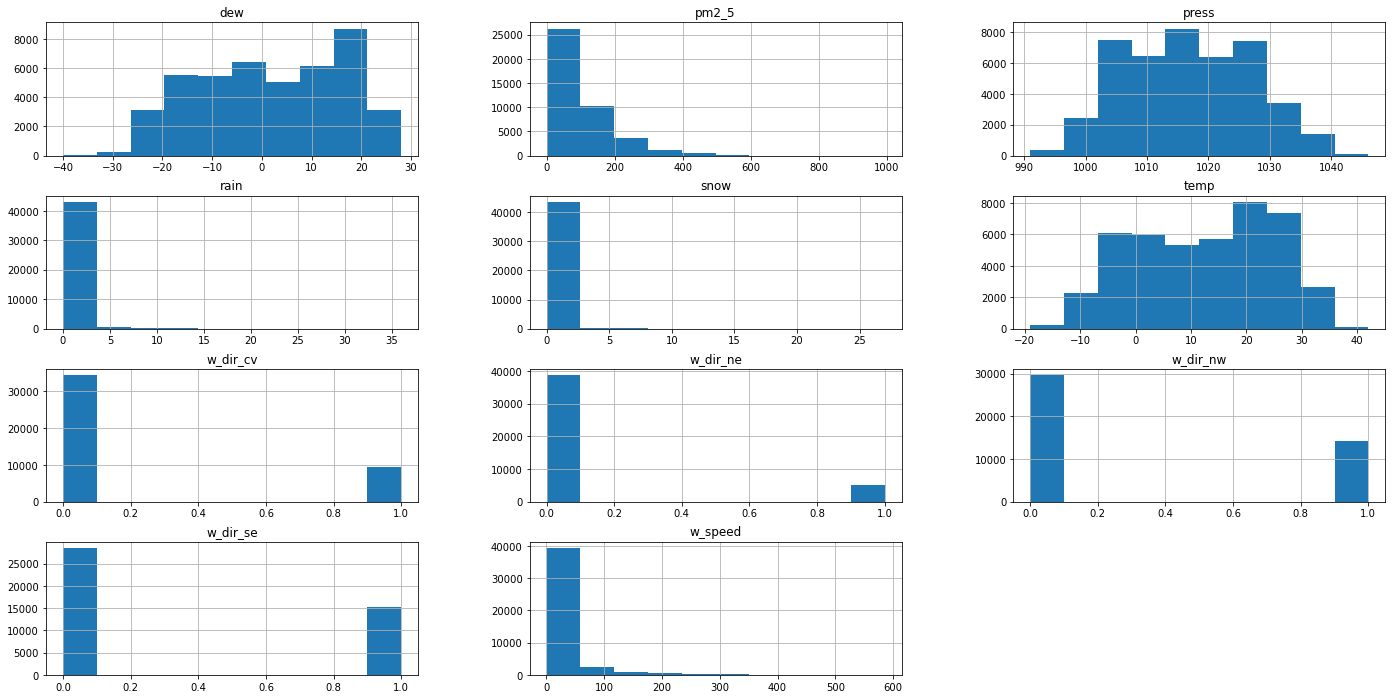

In [9]:
df.hist(figsize=(24,12))

In [10]:
df1.describe()

,pm2_5,dew,temp,press,w_speed,snow,rain,w_dir_ne,w_dir_nw,w_dir_se,w_dir_cv
count,41757.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,98.613215,1.828516,12.459041,1016.447306,23.894307,0.052763,0.195023,0.114064,0.322603,0.349087,0.214247
std,92.050387,14.429326,12.193384,10.271411,50.022729,0.760582,1.416247,0.317893,0.467477,0.476687,0.410303
min,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43800 entries, 2010-01-02 00:00:00 to 2014-12-31 23:00:00
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pm2_5     41757 non-null  float64
 1   dew       43800 non-null  int64  
 2   temp      43800 non-null  float64
 3   press     43800 non-null  float64
 4   w_speed   43800 non-null  float64
 5   snow      43800 non-null  int64  
 6   rain      43800 non-null  int64  
 7   w_dir_ne  43800 non-null  int64  
 8   w_dir_nw  43800 non-null  int64  
 9   w_dir_se  43800 non-null  int64  
 10  w_dir_cv  43800 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 4.0 MB


In [12]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
df2=df1.resample('60T').asfreq()

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43800 entries, 2010-01-02 00:00:00 to 2014-12-31 23:00:00
Freq: 60T
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pm2_5     41757 non-null  float64
 1   dew       43800 non-null  int64  
 2   temp      43800 non-null  float64
 3   press     43800 non-null  float64
 4   w_speed   43800 non-null  float64
 5   snow      43800 non-null  int64  
 6   rain      43800 non-null  int64  
 7   w_dir_ne  43800 non-null  int64  
 8   w_dir_nw  43800 non-null  int64  
 9   w_dir_se  43800 non-null  int64  
 10  w_dir_cv  43800 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 4.0 MB


In [14]:
df2.head()

,pm2_5,dew,temp,press,w_speed,snow,rain,w_dir_ne,w_dir_nw,w_dir_se,w_dir_cv
date,,,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0,0,0,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0,0,0,1,0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2ee3c64e0>,
      dtype=object)

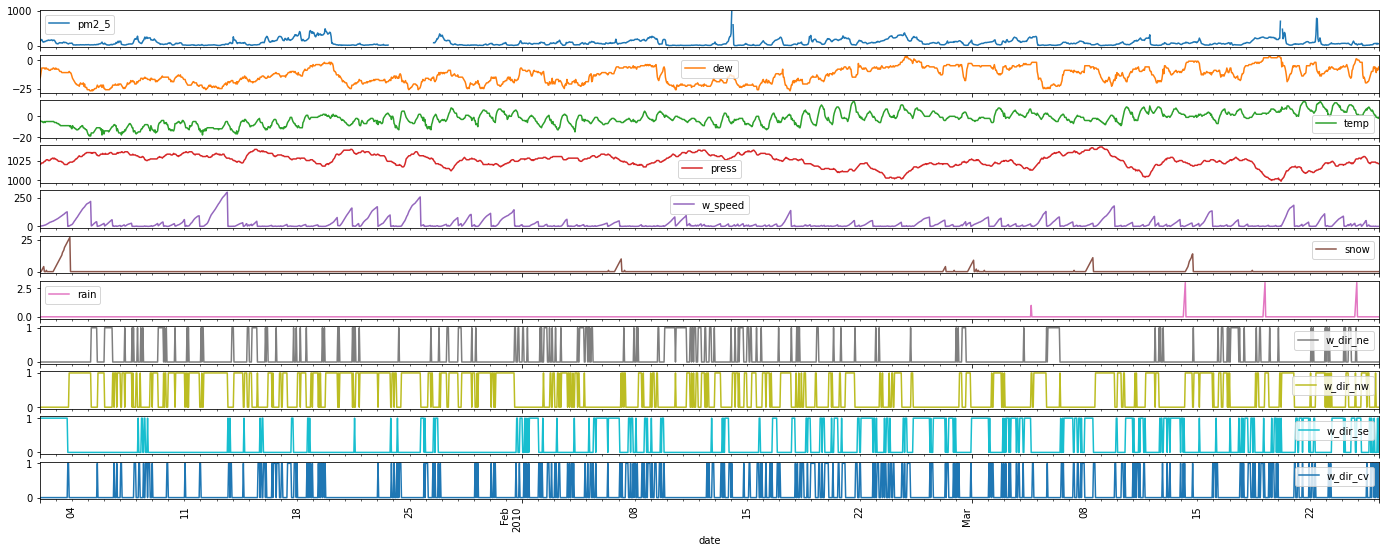

In [15]:
df2[:2000].plot(subplots=True, figsize=(24, 10),rot=90)

In [16]:
df2.to_csv('00_exploration_pm2_5.csv',index=True,header=True)

In [18]:
df3 = pd.read_csv('00_exploration_pm2_5.csv', index_col=0)
df3.index=df3.index.astype('datetime64[ns]')

In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43800 entries, 2010-01-02 00:00:00 to 2014-12-31 23:00:00
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pm2_5     41757 non-null  float64
 1   dew       43800 non-null  int64  
 2   temp      43800 non-null  float64
 3   press     43800 non-null  float64
 4   w_speed   43800 non-null  float64
 5   snow      43800 non-null  int64  
 6   rain      43800 non-null  int64  
 7   w_dir_ne  43800 non-null  int64  
 8   w_dir_nw  43800 non-null  int64  
 9   w_dir_se  43800 non-null  int64  
 10  w_dir_cv  43800 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 4.0 MB


In [20]:
df3.head()

,pm2_5,dew,temp,press,w_speed,snow,rain,w_dir_ne,w_dir_nw,w_dir_se,w_dir_cv
date,,,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0,0,0,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0,0,0,1,0


In [21]:
df3.index

DatetimeIndex(['2010-01-02 00:00:00', '2010-01-02 01:00:00',
               '2010-01-02 02:00:00', '2010-01-02 03:00:00',
               '2010-01-02 04:00:00', '2010-01-02 05:00:00',
               '2010-01-02 06:00:00', '2010-01-02 07:00:00',
               '2010-01-02 08:00:00', '2010-01-02 09:00:00',
               ...
               '2014-12-31 14:00:00', '2014-12-31 15:00:00',
               '2014-12-31 16:00:00', '2014-12-31 17:00:00',
               '2014-12-31 18:00:00', '2014-12-31 19:00:00',
               '2014-12-31 20:00:00', '2014-12-31 21:00:00',
               '2014-12-31 22:00:00', '2014-12-31 23:00:00'],
              dtype='datetime64[ns]', name='date', length=43800, freq=None)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2ed14d0f0>,
      dtype=object)

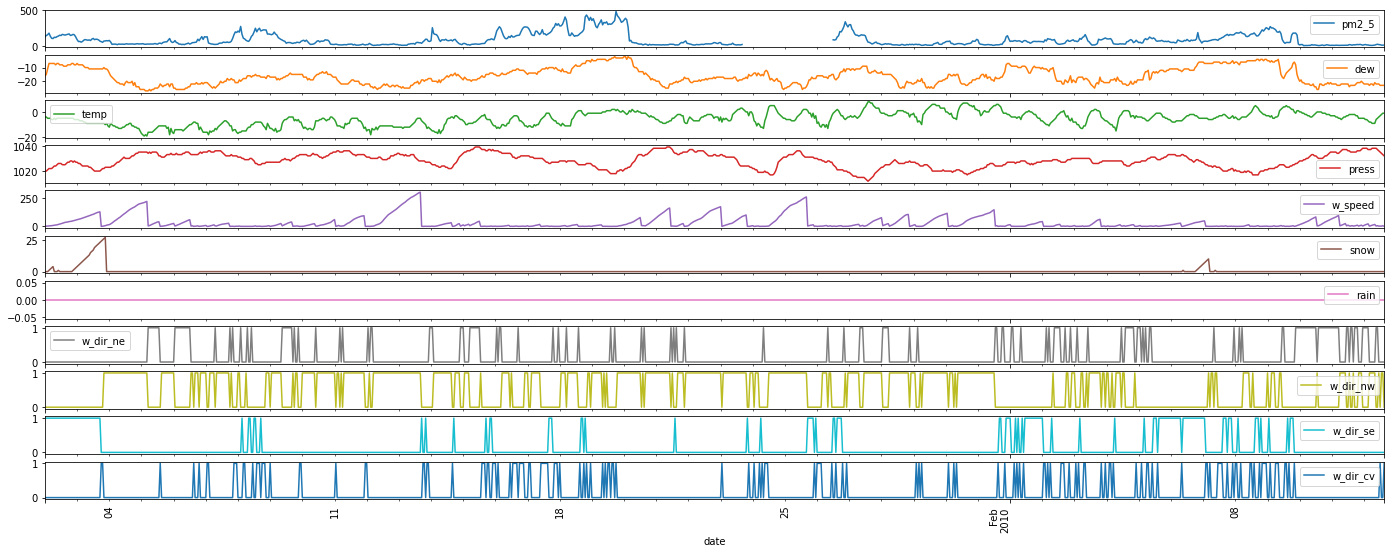

In [22]:
df3[:1000].plot(subplots=True, figsize=(24, 10),rot=90)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2e719d710>,
      dtype=object)

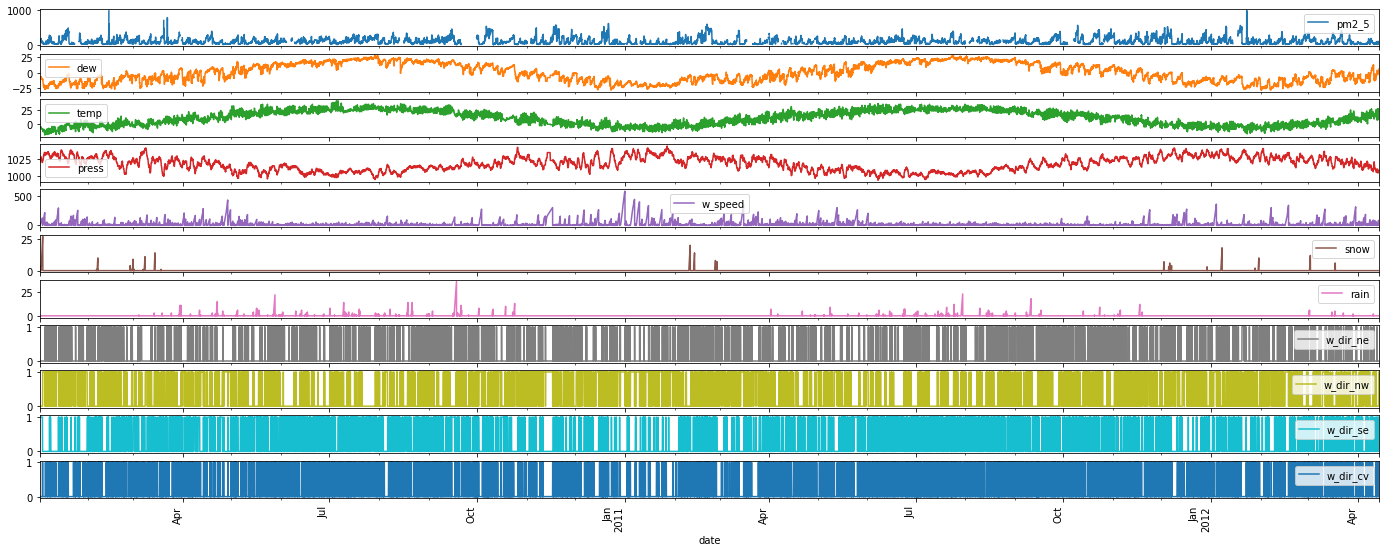

In [23]:
import matplotlib.dates as mdates
#fig, ax = plt.subplots(figsize=(15,7))
df3[:20000].plot(subplots=True, figsize=(24, 10),rot=90)
#set ticks every week
#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2e5b8da90>,
      dtype=object)

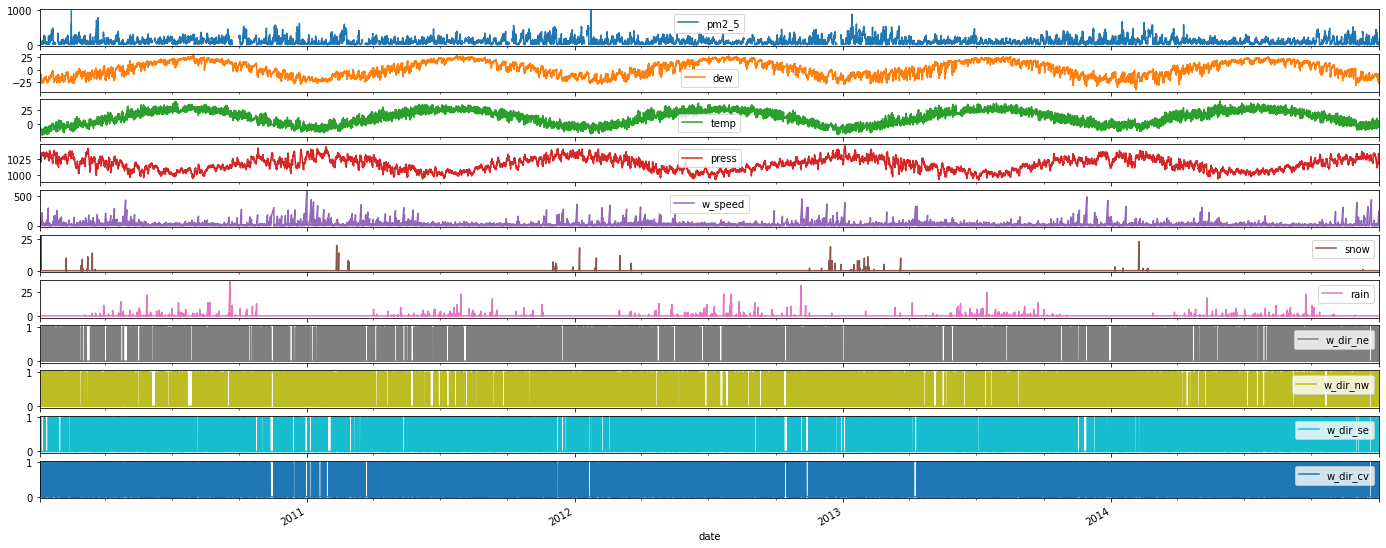

In [24]:
#https://pandas.pydata.org/pandas-docs/version/0.13.1/visualization.html#targeting-different-subplots
from matplotlib import pyplot as plt
df3[:].plot(subplots=True, figsize=(24, 10))
#plt.legend(loc='best')